In [1]:
#create a random network

import  networkx as nx

n_nodes=15  #number of nodes
#ba = nx.barabasi_albert_graph(n_nodes, 1)
ba = nx.barabasi_albert_graph(n_nodes, 2, seed=42)

In [2]:
#add endpoints
import random as rnd
lndv=[]
nndn=[]
for v in nx.degree(ba):
    #if node connects two neighbors
    if v[1] == 2:
        lndv.append(v[0]) 

#add endpoints to network
for i in (lndv):
    nnd=rnd.randint(1,4)
    nndn.append(nnd)   
    for j in range (nnd):        
        ba.add_node(n_nodes)
        ba.add_edge(i,n_nodes)
        n_nodes+=1


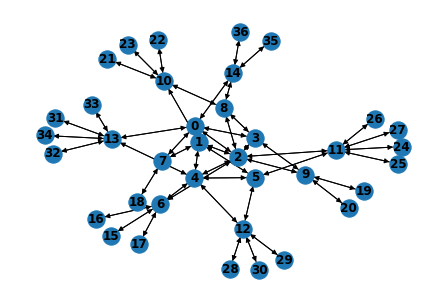

In [4]:
#draw the network
import matplotlib.pyplot as plt
dir_ba = ba.to_directed()
nx.draw(dir_ba, with_labels=True, font_weight='bold', pos=nx.spring_layout(dir_ba))
plt.savefig("path.png")
plt.show()

In [5]:
SRV_CMP_PWR = 1000

# Capacity of each link in Mb/s
SRV_LINK_CAP = 20000
ROUT_LINK_CAP = 10000
ENDP_LINK_CAP = 1000

# Probability of assigning node as router or server
SERV_PROB = 0.3
ROUT_PROB = 1 - SERV_PROB

# demand that represents data sent from servers to endpoints in MFLOPS
ENDP_DEMAND = 10
SRV_DEMAND = 0  # Server demand is adjusted later
ROUT_DEMAND = 0

# delay that each node introduce in ms
SRV_DELAY = 10
ROUT_DELAY = 1
ENDP_DELAY = 0.2

# cost of using each link
ENDP_WEIGHT = 10
ROUT_WEIGHT = 100
SRV_WEIGHT = 500

# colors of devices used in visualization
ENDP_COLOR = 'orange'
ROUT_COLOR = 'green'
SRV_COLOR = 'red'


In [11]:
color_map = []
list_servers =[]
# Assigning role for each node
for v in nx.degree(dir_ba):

    # if node connects to 2 neighbours
    if v[1] == 2:

        # mark as endpoint:
        dir_ba.nodes[v[0]]['type'] = 'Endpoint'
        dir_ba.nodes[v[0]]['demand'] = ENDP_DEMAND
        dir_ba.nodes[v[0]]['delay'] = ENDP_DELAY
        color_map.append(ENDP_COLOR)

        # add maximum capacity of connection
        for connection in list(nx.neighbors(dir_ba, v[0])):
            dir_ba[v[0]][connection]['capacity'] = ENDP_LINK_CAP            
            dir_ba[v[0]][connection]['weight'] = ENDP_WEIGHT

    # if node has more connection choose whether is Server or router
    else:
        flnr=0
        for i in (lndv):            
            if i == v[0]:
                flnr=1                 
        if flnr ==1:
            dir_ba.nodes[v[0]]['type'] = 'Router'
            dir_ba.nodes[v[0]]['demand'] = ROUT_DEMAND
            dir_ba.nodes[v[0]]['delay'] = ROUT_DELAY
            color_map.append(ROUT_COLOR)
            flnr=0
            
        else:
            
            if rnd.random() <= ROUT_PROB:
                dir_ba.nodes[v[0]]['type'] = 'Router' 
                dir_ba.nodes[v[0]]['demand'] = ROUT_DEMAND
                dir_ba.nodes[v[0]]['delay'] = ROUT_DELAY
                color_map.append(ROUT_COLOR)                                                 

            else:
                dir_ba.nodes[v[0]]['type'] = 'Server'
                dir_ba.nodes[v[0]]['demand'] = SRV_DEMAND
                dir_ba.nodes[v[0]]['delay'] = SRV_DELAY
                color_map.append(SRV_COLOR)
                list_servers.append(v[0])
                                          

        adj = list(nx.neighbors(dir_ba, v[0]))
        for neighbour in adj:
            if dir_ba.nodes[v[0]]['type'] == 'Router':
                dir_ba[v[0]][neighbour]['capacity'] = ROUT_LINK_CAP
                dir_ba[v[0]][neighbour]['weight'] = ROUT_WEIGHT
            if dir_ba.nodes[v[0]]['type'] == 'Server':
                dir_ba[v[0]][neighbour]['capacity'] = SRV_LINK_CAP
                dir_ba[v[0]][neighbour]['weight'] = SRV_WEIGHT
                
## list all nodes:
#     print('\n')
#     print('node number: ', v[0])
#     print('node type: ', ba.nodes[v[0]]['type'])
    #print('Demand: ', dir_ba.nodes[v[0]]['demand'])
    #for neighbour in list(nx.neighbors(dir_ba, v[0])):
        #print(v[0],'Capacity with node', neighbour, ': ', dir_ba[v[0]][neighbour]['capacity'],dir_ba[v[0]][neighbour]['weight'])
        
print (dir_ba.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [15]:
#add demands to servers 

Demand_EPs=0
Cont_serv=0
for i in dir_ba.nodes:
    if dir_ba.nodes[i]['type'] == 'Endpoint':
        Demand_EPs=dir_ba.nodes[i]['demand']+Demand_EPs

Demand_SVs=int(Demand_EPs/len(list_servers))

for i in range (len(list_servers)):
    if i == len(list_servers)-1:
        Demand_SVs=Demand_EPs-(Demand_SVs*(len(list_servers)-1))
    dir_ba.nodes[list_servers[i]]['demand']=-Demand_SVs



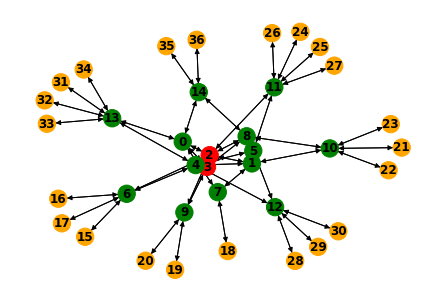

In [16]:
#nx.draw(dir_ba, with_labels=True, font_weight='bold', pos=nx.spring_layout(dir_ba))

nx.draw(dir_ba, pos=nx.spring_layout(dir_ba), with_labels=True, font_weight='bold', node_color=color_map)
plt.savefig("path_directed.png")
plt.show()

In [18]:
## solving network for minimum cost.
[flowCost, flowDict] = nx.algorithms.network_simplex(dir_ba,demand='demand', capacity='capacity', weight='weight')

# print("total cost:", flowCost)
# print("flow dict:", flowDict)

print("Used links ((node1, node2), flow):", 
      sorted([((u, v), flowDict[u][v]) for u in flowDict for v in flowDict[u] if flowDict[u][v] > 0]))

Used links ((node1, node2), flow): [((0, 7), 10), ((0, 13), 40), ((0, 14), 20), ((2, 4), 30), ((2, 6), 30), ((2, 9), 10), ((2, 11), 40), ((3, 0), 70), ((3, 8), 30), ((3, 9), 10), ((4, 12), 30), ((6, 15), 10), ((6, 16), 10), ((6, 17), 10), ((7, 18), 10), ((8, 10), 30), ((9, 19), 10), ((9, 20), 10), ((10, 21), 10), ((10, 22), 10), ((10, 23), 10), ((11, 24), 10), ((11, 25), 10), ((11, 26), 10), ((11, 27), 10), ((12, 28), 10), ((12, 29), 10), ((12, 30), 10), ((13, 31), 10), ((13, 32), 10), ((13, 33), 10), ((13, 34), 10), ((14, 35), 10), ((14, 36), 10)]


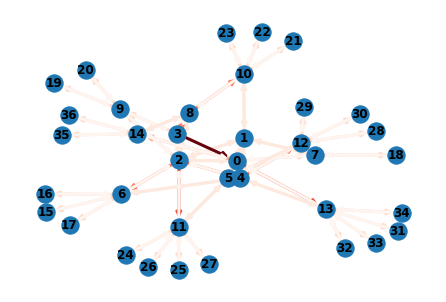

In [22]:
spentEdges = [(u, v) for u in flowDict for v in flowDict[u] if flowDict[u][v] > 0]
## coloring of nodes

color_edge_map=[]

for edg in dir_ba.edges():
    if edg in spentEdges or (edg[1],edg[0]) in spentEdges:
        color_edge_map.append(flowDict[edg[0]][edg[1]])
#         print(edg)
    else:
        color_edge_map.append(5)
# print(color_edge_map)

# displaying graph with hihligted paths
nx.draw(dir_ba, pos=nx.spring_layout(ba), with_labels=True, font_weight='bold', edge_color=color_edge_map,width=3,edge_cmap=plt.cm.Reds)
plt.savefig("path_directed.png")
plt.show()

In [ ]:
#Assing funtion of nodes

#counters
cont_endponint=0
cont_server=0
cont_router=0

# Iterate over end nodes:
for v in nx.degree(ba):
    #if node connects only to one neighbour
    if v[1] == 1:
        
        #mark as endpoint and add numer:
        cont_endponint+=1
        ba.nodes[v[0]]['type'] = 'Ep'+str(cont_endponint)
        
        #if node has more connection choose whether is Server or router
    else:  
        if v[0] % 2 == 0:
            cont_router+=1
            ba.nodes[v[0]]['type'] = 'R'+str(cont_router)  
        else:
            cont_server+=1
            ba.nodes[v[0]]['type'] = 'S'+str(cont_server)               
                
#print ('-Numer of endpoints:', cont_endponint,', -Numer of routers:',cont_router,', -Numer of servers:',cont_server)

In [ ]:
#create a dataframe to organize and analyze the information of the network 
#and add parameters of the each link
import pandas as pd

#capacity of links
SRV_LINK_CAP = 150
RUT_LINK_CAP = 200
EP_LINK_CAPu = 8
EP_LINK_CAPd = 16

#cost of using the links
SRV_LINK_UCOST = 10
RUT_LINK_UCOST = 15
EP_LINK_UCOST = 5

#cost of open the links
SRV_LINK_OCOST = 20
RUT_LINK_OCOST = 25
EP_LINK_OCOST = 10
        
data = pd.DataFrame([], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost', 'O_cost'])
for v in nx.degree(ba): 
    adj = list(nx.neighbors(ba, v[0]))
    for neig in adj:
        if ba.nodes[v[0]]['type'][0:1] == 'R' and ba.nodes[neig]['type'][0:1] == 'R': 
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],RUT_LINK_CAP,RUT_LINK_UCOST,RUT_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)
            
        elif ba.nodes[v[0]]['type'][0:1] == 'R' and ba.nodes[neig]['type'][0:1] == 'S':   
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],SRV_LINK_CAP,SRV_LINK_UCOST,SRV_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)
        
        elif ba.nodes[v[0]]['type'][0:1] == 'R' and ba.nodes[neig]['type'][0:1] == 'E':   
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],EP_LINK_CAPd,EP_LINK_UCOST,EP_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)
        
        elif ba.nodes[v[0]]['type'][0:1] == 'S' and ba.nodes[neig]['type'][0:1] == 'S':   
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],SRV_LINK_CAP,SRV_LINK_UCOST,SRV_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)
        
        elif ba.nodes[v[0]]['type'][0:1] == 'S' and ba.nodes[neig]['type'][0:1] == 'R':   
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],SRV_LINK_CAP,SRV_LINK_UCOST,SRV_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)

        elif ba.nodes[v[0]]['type'][0:1] == 'S' and ba.nodes[neig]['type'][0:1] == 'E':   
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],EP_LINK_CAPd,EP_LINK_UCOST,EP_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)
        
        elif ba.nodes[v[0]]['type'][0:1] == 'E' and ba.nodes[neig]['type'][0:1] == 'S':   
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],EP_LINK_CAPu,EP_LINK_UCOST,EP_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)

        elif ba.nodes[v[0]]['type'][0:1] == 'E' and ba.nodes[neig]['type'][0:1] == 'R':   
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],EP_LINK_CAPu,EP_LINK_UCOST,EP_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)

data.index=data.index+1            
data['Edge_id'] = data.index #add index route
data.to_csv('network.csv') #create a .csv file with the information of the network

In [ ]:
#cost of using the nodes
SRV_NODE_COST = 10
RUT_NODE_COST = 15
EP_NODE_COST = 5

dat_node = pd.DataFrame([], columns=['id','type'])
dat_node['id'] = data['From_id']
dat_node['type'] = data['From_type']
dat_node = dat_node.drop_duplicates(subset='type', keep='first')
dat_node = dat_node.reset_index(drop=True)
dat_node['O_cost'] = ''

dat_node.index= dat_node.index+1

for i in range (1, len(dat_node)+1):
    if dat_node['type'][i][0:1] == 'R':
        dat_node['O_cost'][i] = RUT_NODE_COST
    elif dat_node['type'][i][0:1] == 'S':
        dat_node['O_cost'][i] = SRV_NODE_COST
    elif dat_node['type'][i][0:1] == 'E':
        dat_node['O_cost'][i] = EP_NODE_COST

In [ ]:
#create the network with the new indexes 
Network = nx.Graph()
Network.add_nodes_from([1, n_nodes])
for i in range(1, len(data)+1):
    Network.add_edge(data['From_id'][i], data['To_id'][i])

In [ ]:
#draw the network
import matplotlib.pyplot as plt

nx.draw(Network, with_labels=True, font_weight='bold', pos=nx.spring_layout(Network))
plt.savefig("path.png")
plt.show()
print ('-Numer of endpoints:', cont_endponint,', -Numer of routers:',cont_router,', -Numer of servers:',cont_server)
#print (data)

In [ ]:
data.head() 

In [ ]:
dat_node.head()

In [ ]:
#generar demandas 
import random as rnd

list_ep=[]
#obtener los endpoints y servidores de la red 
for i in range (1, len(dat_node)+1):
    if dat_node['type'][i][0:1] == 'E':
        list_ep.append(dat_node['id'][i])

Endp_A=rnd.sample(list_ep,  3)
#print('list Endpoints',list_ep)
#print ('list Endpoints active',Endp_A)

#obtener los vecinos y el nivel en el que se encuentran (saltos)
def level_node (nram):   
    
    list_node = []
    list_type=[]
    list_level=[]
    list_temp=[]
    level=0

    list_node.append(nram)
    list_type.append(dat_node['type'][nram])
    list_level.append(level)
    fle=1      #bandera que indica que se subio de nivel
    list_temp=list_node

    while 1:
        #time.sleep(2)
        list_temp2=[]   
        if fle ==1: #aumentar el nivel de nodo
            level +=1
            fle=0
        else:
            break
        for i in range (len(list_temp)):
            adj = list(nx.neighbors(Network, list_temp[i])) #obtiene los vecinos del nodo        
            for j in range (len(adj)):
                fn=0
                for k in range (len(list_node)):
                    if adj[j]==list_node[k]:
                        fn=1
                if fn == 0:
                    list_temp2.append(adj[j])
                    list_node.append(adj[j])
                    list_type.append(dat_node['type'][adj[j]])
                    list_level.append(level)
                    fle=1
        list_temp=list_temp2

    data_level = pd.DataFrame([], columns=['id','type','level'])    
    data_level['id'], data_level['type'], data_level['level'] =list_node,list_type,list_level
    #print (data_level)
    return data_level

data_demand = pd.DataFrame([], columns=['From','To','Demand'])

for k in range (len(Endp_A)):
    ctr_ser=1
    ctr_enp=1
    data_level= level_node(Endp_A[k])
    for i in range (1, len(data_level['type'])):
        if data_level['type'][i][0:1]=='S' and ctr_ser<=2:#cantidad de servidores
            ctr_ser+=1
            data_demand = data_demand.append(pd.DataFrame([[data_level['id'][i],Endp_A[k],2]], columns=['From','To','Demand']), ignore_index = True)
            #print (data_level['type'][i],data_level['level'][i])
        elif data_level['type'][i][0:1]=='E':
            flep=0
            for j in range (len(Endp_A)):
                if data_level['id'][i]==Endp_A[j]:
                    flep=1
            if flep == 0 and ctr_enp <=3: #cantidad de endpoints
                ctr_enp+=1
                data_demand = data_demand.append(pd.DataFrame([[data_level['id'][i],Endp_A[k],2]], columns=['From','To','Demand']), ignore_index = True)
                #print (data_level['id'][i],data_level['type'][i],data_level['level'][i])
    
data_demand.index=data_demand.index+1
#print (data_demand)

In [ ]:
Vn=n_nodes
En=0
for i in range(1, len(data)+1): 
    if En <= data['Edge_id'][i]:
        En = data['Edge_id'][i]

In [ ]:
#create de file data.dat with the information of the network for optimization
with open("data.dat", "w") as f:
    f.write("""
data;
#-----------------------------------------------------------------------
#liczba łuki, zapotrzebowań oraz ścieżek

param Vn := {Vn};
param En := {En};
param Dn := {Dn};

        """.format(Vn=Vn, En=En, Dn=len(data_demand)))

#*************************************************************************

with open("data.dat", "a") as f:
    f.write("""
#-----------------------------------------------------------------------
#rozmiar zapotrzebowania d, węzeł żródłowy d, węzeł docelowy d
param : h  s  t :=
""")

    for i in range(1,len(data_demand)+1):       
        f.write("""  {d}      {h} {s} {t}
""".format(d=data_demand.index[i-1], h=data_demand['Demand'][i], s=data_demand['From'][i],t=data_demand['To'][i]))
    f.write(""";""")

#*************************************************************************     

with open("data.dat", "a") as f:
    f.write("""
#-----------------------------------------------------------------------
#węzłe-łącze  Aev(e,v) 
param : A :=
""")

    for i in range(1, En+1):       
        f.write("""  {link_number}  {From_edge_number}    1
""".format(link_number=data['Edge_id'][i], From_edge_number=data['From_id'][i]))
    f.write(""";""")

#*************************************************************************    
    
with open("data.dat", "a") as f:
    f.write("""

#----------------------------------------------------------------------- 
#węzłe-łącze  Bev(e,v) 
param : B :=
""")
        
    for i in range(1,En+1):       
        f.write("""  {link_number}  {to_edge_number}    1
""".format(link_number=data['Edge_id'][i], to_edge_number=data['To_id'][i]))
    f.write(""";""")

#*************************************************************************    
    
with open("data.dat", "a") as f:
    f.write("""

#-----------------------------------------------------------------------       
#koszt jednostkowy użycia przepływności na łączach     
param : K :=
""")
    for i in range(1,En+1):       
        f.write("""  {link_number}  {cost}
""".format(link_number=data['Edge_id'][i], cost=data['U_cost'][i]))
    f.write(""";""")
    
#*************************************************************************    
    
with open("data.dat", "a") as f:
    f.write("""

#-----------------------------------------------------------------------       
#koszt jednostkowy użycia przepływności na łączach     
param : C :=
""")
    for i in range(1,En+1):       
        f.write("""  {link_number}  {cap}
""".format(link_number=data['Edge_id'][i], cap=data['Capacity'][i]))
    f.write(""";""")
        
#*************************************************************************        
        
with open("data.dat", "a") as f:
    f.write("""
    
#----------------------------------------------------------------------- 
#upper bound for the degree of transit node v     
param : G :=
""")
    for i in range(1,Vn+1):       
        f.write("""  {node_number}  {grade}
""".format(node_number=i, grade=Network.degree[i]))        
    f.write(""";""")

#*************************************************************************      
    
    
with open("data.dat", "a") as f:
     f.write("""
end;
""")

In [ ]:
#run the math-program with the data of the network created 
!cbc projekt.mod%data.dat -solve -solu result.csv

In [ ]:
#clean and organize the data optained in the 
with open("result.csv", "r") as f:
    fl =f.readlines()
    f.close()

data_r = pd.DataFrame([], columns=['Demand','Edge','flow'])        
#data = data.append(pd.DataFrame([[v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],ba[v[0]][neig]['cost'],ba[v[0]][neig]['capacity']]], columns=['From_index','To_index','From_type','To_type','Cost','Capacity']), ignore_index = True)        
for j in range (len(fl)):
    flag =0
    temp1=''
    temp2=''
    temp3=''
    for i in range (len(fl[j])):
        if fl[j][i] == 'x' and flag == 0:
            flag =1                    
        elif fl[j][i] == '[' and flag == 1:
            flag =2
        elif fl[j][i] != ',' and flag == 2:        
            temp1 = temp1+fl[j][i]
        elif fl[j][i] == ',' and flag == 2:
            flag =3            
        elif fl[j][i] != ']' and flag == 3:
            temp2 = temp2+fl[j][i]            
        elif fl[j][i] == ']' and flag == 3:
            flag =4
        elif fl[j][i] != ' ' and flag == 4:
            flag =5
            temp3 = temp3+fl[j][i]
        elif fl[j][i] != ' ' and flag == 5:
            temp3 = temp3+fl[j][i]
        elif fl[j][i] == ' ' and flag == 5:
            break
    if temp1 != '':        
        data_r = data_r.append(pd.DataFrame([[temp2,temp1,temp3]], columns=['Demand','Edge','flow']), ignore_index = True)        


In [ ]:
Net_demand = nx.Graph()
data_r['From']=''
data_r['To']=''
for i in range(len(data_r)):
    Net_demand.add_node(data['From_id'][int(data_r['Edge'][i])])
    Net_demand.add_node(data['To_id'][int(data_r['Edge'][i])])
    data_r['From'][i]=data['From_id'][int(data_r['Edge'][i])]
    data_r['To'][i]=data['To_id'][int(data_r['Edge'][i])]

for i in range(len(data_r)):    
    Net_demand.add_edge(data_r['From'][i],data_r['To'][i])
data_r.head()   

In [ ]:
nx.draw(Net_demand, with_labels=True, font_weight='bold', pos=nx.spring_layout(Net_demand))
plt.savefig("demands.png")
plt.show() 
print (data_r)